https://flothesof.github.io/removing-background-scikit-image.html

In [2]:
!pip install scikit-image

In [4]:
from skimage import io as skio
url = 'http://i.stack.imgur.com/SYxmp.jpg'
img = skio.imread(url)

In [37]:
print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))

shape of image: (1100, 762)
dtype of image: uint8


In [38]:
from skimage import filters
sobel = filters.sobel(img)

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 200

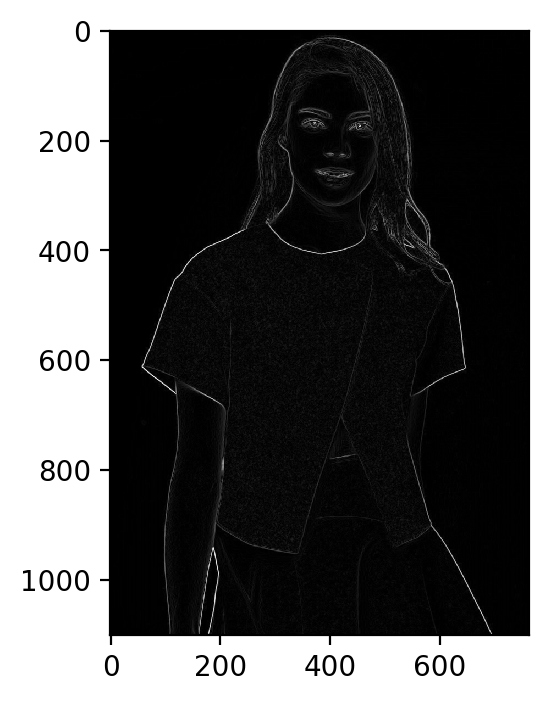

In [40]:
plt.imshow(sobel)

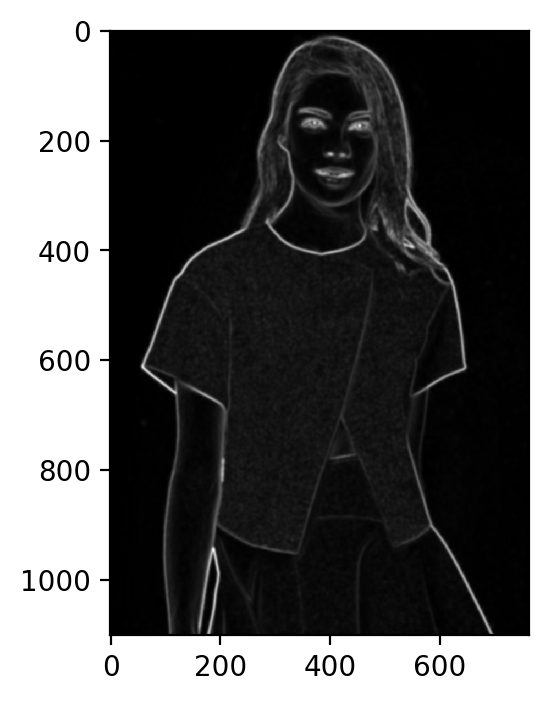

In [41]:
blurred = filters.gaussian(sobel, sigma=2.0)
plt.imshow(blurred)

Light & Dark Spots

In [42]:
import numpy as np
light_spots = np.array((img > 245).nonzero()).T

In [43]:
light_spots.shape

(1432, 2)

Text(0.5, 1.0, 'light spots in image')

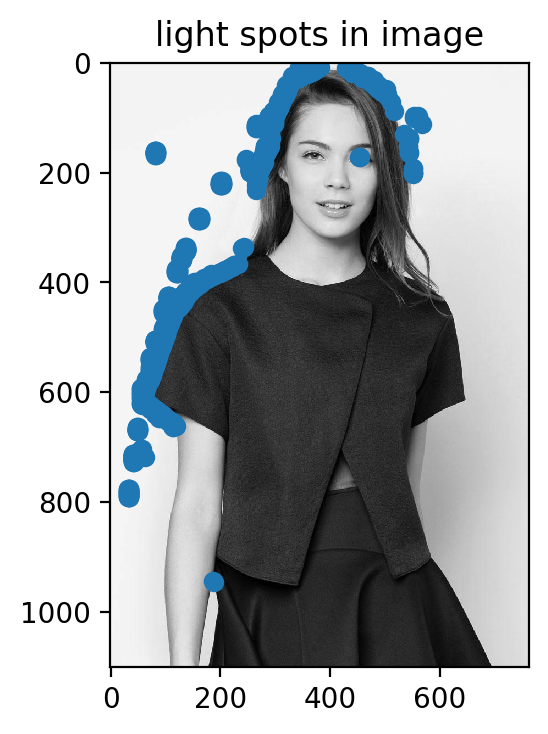

In [44]:
plt.plot(light_spots[:, 1], light_spots[:, 0], 'o')
plt.imshow(img)
plt.title('light spots in image')

In [45]:
dark_spots = np.array((img < 3).nonzero()).T

In [46]:
dark_spots.shape

(1402, 2)

Text(0.5, 1.0, 'dark spots in image')

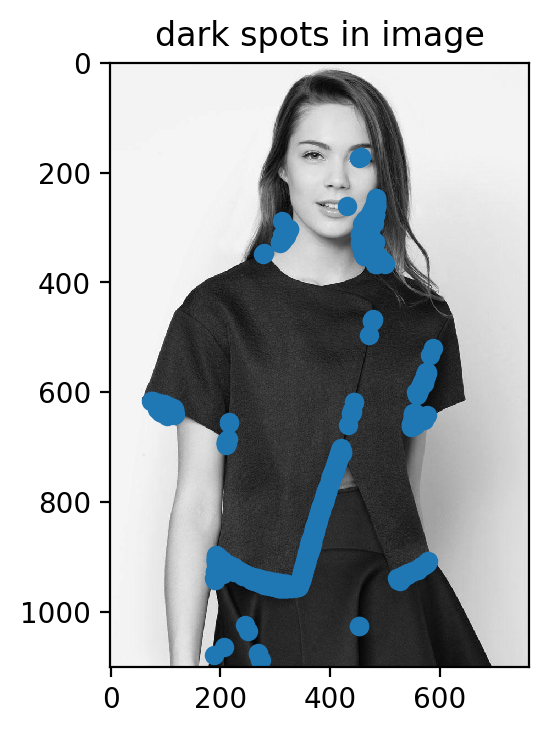

In [47]:
plt.plot(dark_spots[:, 1], dark_spots[:, 0], 'o')
plt.imshow(img)
plt.title('dark spots in image')

In [48]:
from scipy import ndimage as ndi
bool_mask = np.zeros(img.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds

672

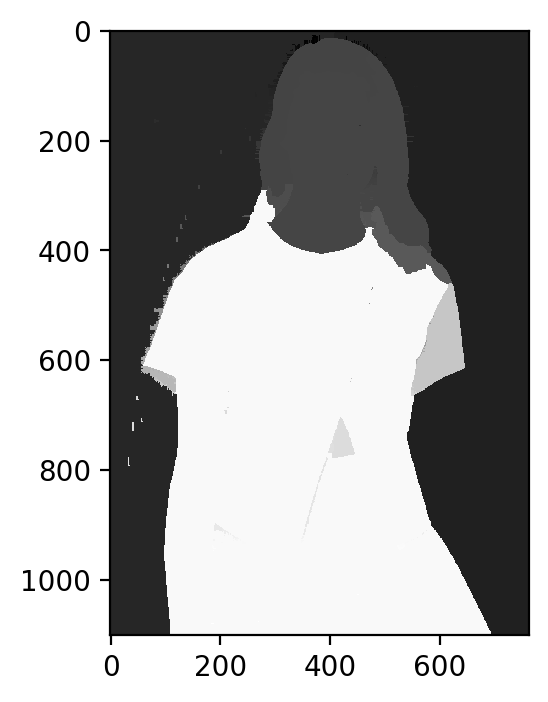

In [49]:
from skimage import segmentation
ws = segmentation.watershed(blurred, seed_mask)
plt.imshow(ws)

In [50]:
background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

656

In [51]:
background_mask = (ws == background)

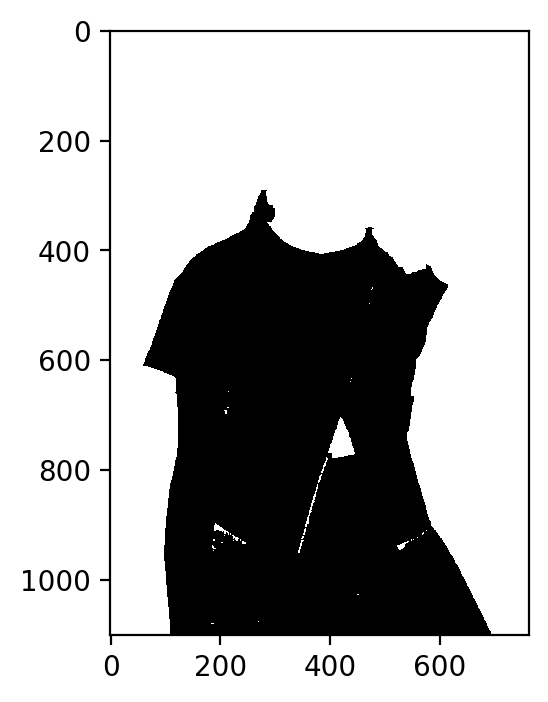

In [52]:
plt.imshow(~background_mask)

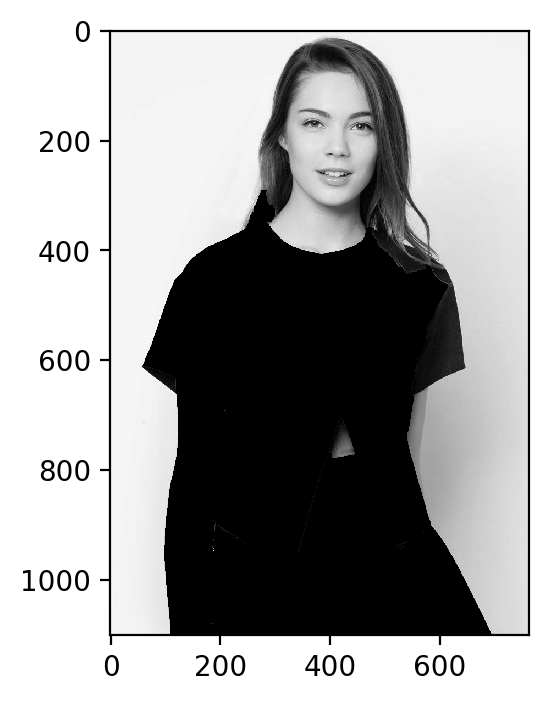

In [53]:
cleaned = img * ~background_mask
plt.imshow(cleaned)

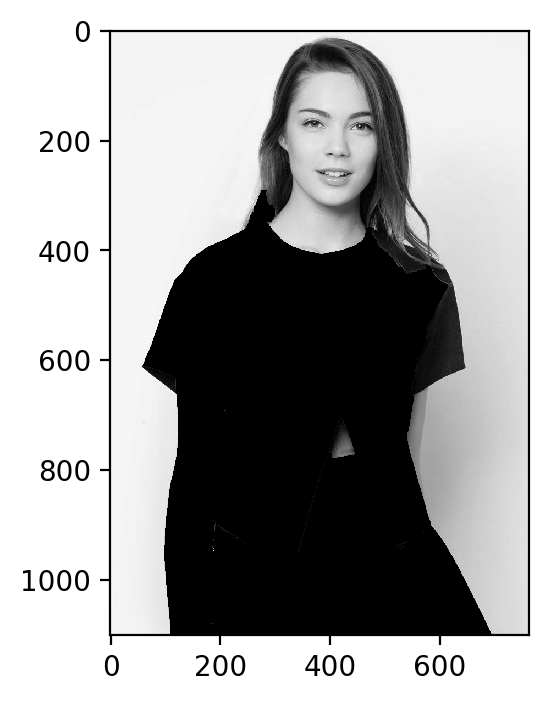

In [54]:
plt.imshow(cleaned, cmap='gray')
plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

In [55]:
def draw_group_as_background(ax, group, watershed_result, original_image):
    "Draws a group from the watershed result as red background."
    background_mask = (watershed_result == group)
    cleaned = original_image * ~background_mask
    ax.imshow(cleaned, cmap='gray')
    ax.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

In [56]:
background_candidates = sorted(set(ws.ravel()), key=lambda g: np.sum(ws == g), reverse=True)

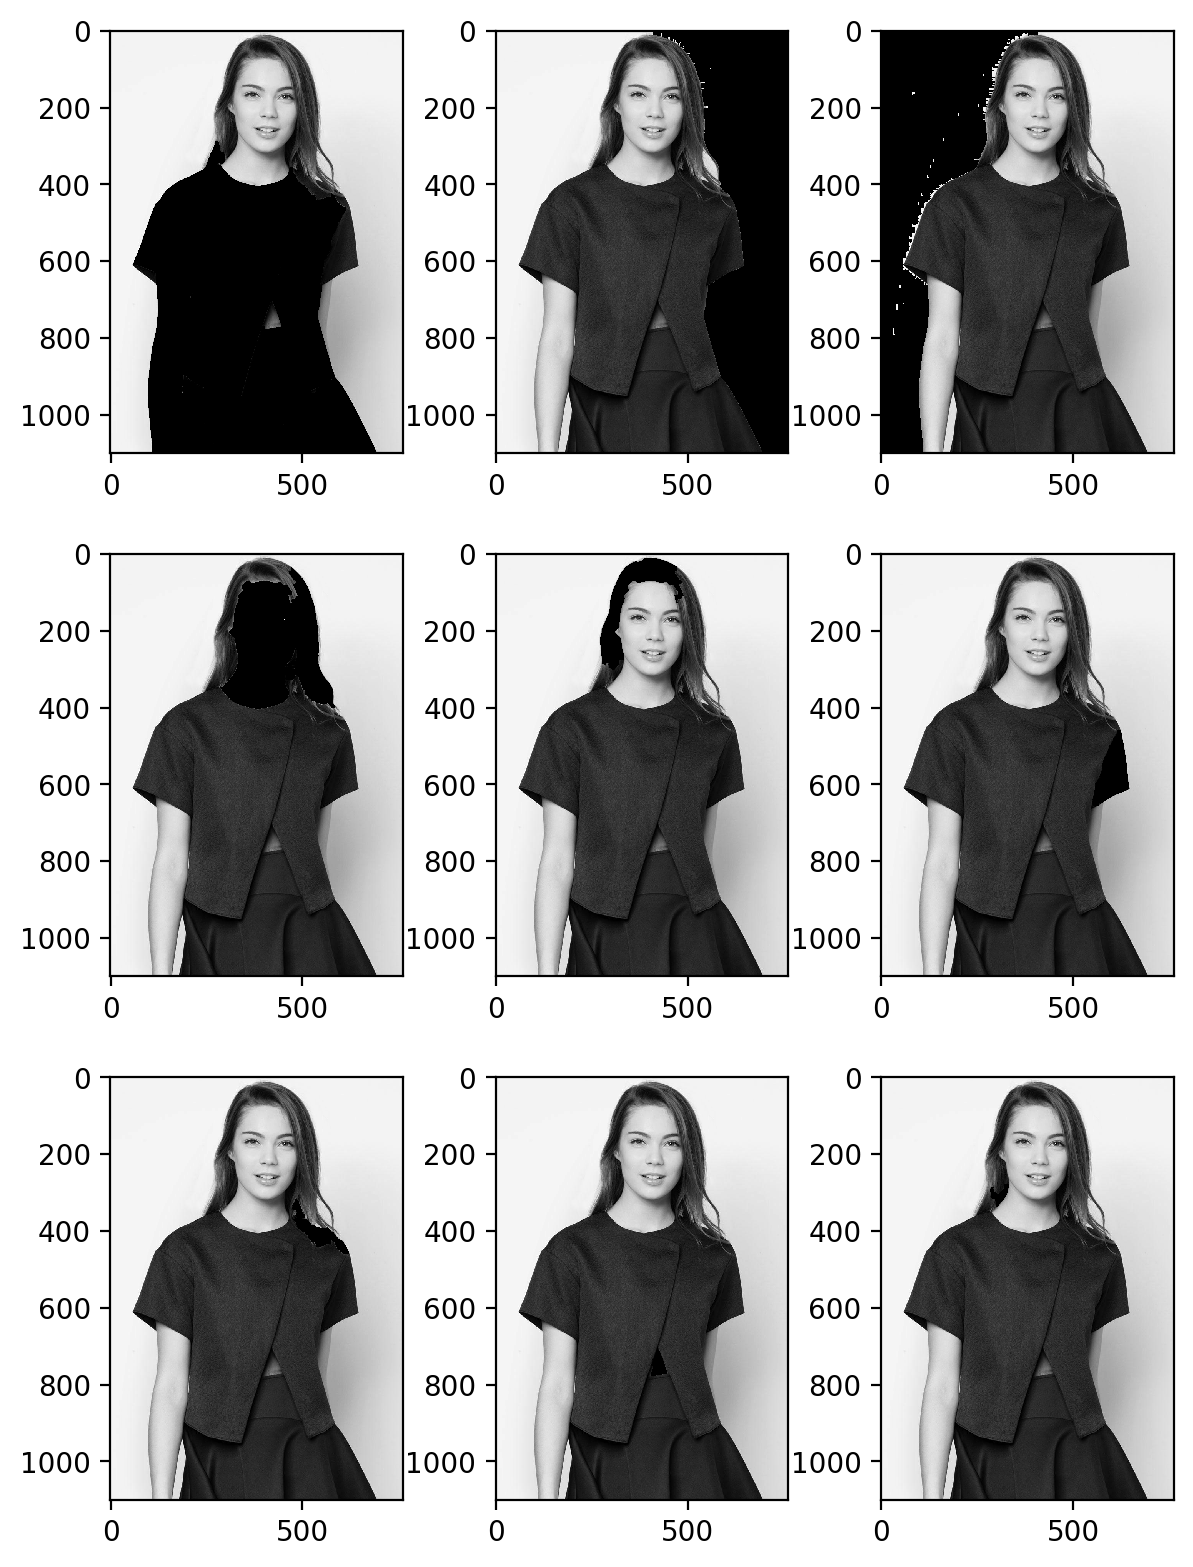

In [57]:
N = 3
fig, axes = plt.subplots(N, N, figsize=(6, 8))
for i in range(N*N):
    draw_group_as_background(axes.ravel()[i], background_candidates[i], ws, img)
plt.tight_layout()

Watershed again

In [58]:
seed_mask = np.zeros(img.shape, dtype=np.int)
seed_mask[0, 0] = 1 # background
seed_mask[600, 400] = 2 # foreground

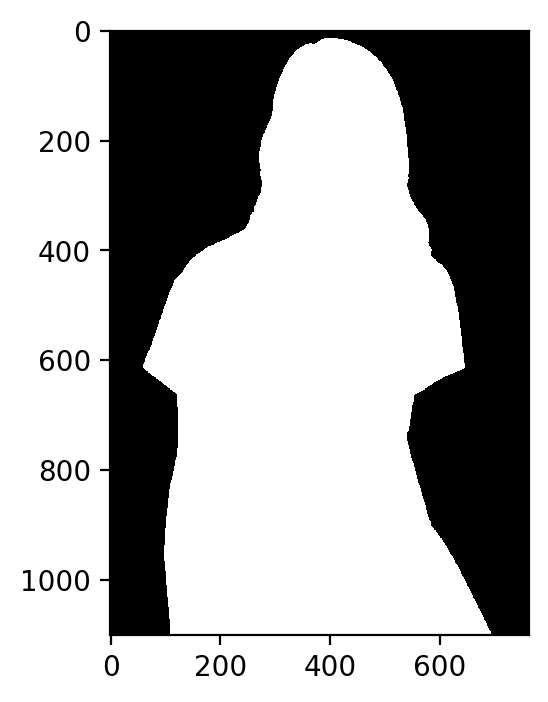

In [60]:
ws = segmentation.watershed(blurred, seed_mask)
plt.imshow(ws)

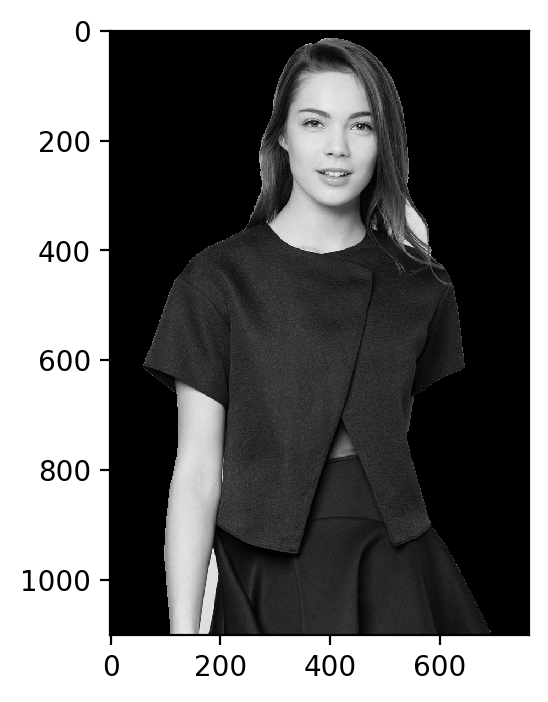

In [61]:
fig, ax = plt.subplots()
draw_group_as_background(ax, 1, ws, img)

Add Missing Arm

In [62]:
seed_mask = np.zeros(img.shape, dtype=np.int)
seed_mask[0, 0] = 1 # background
seed_mask[600, 400] = 2 # foreground
seed_mask[1000, 150] = 2 # left arm

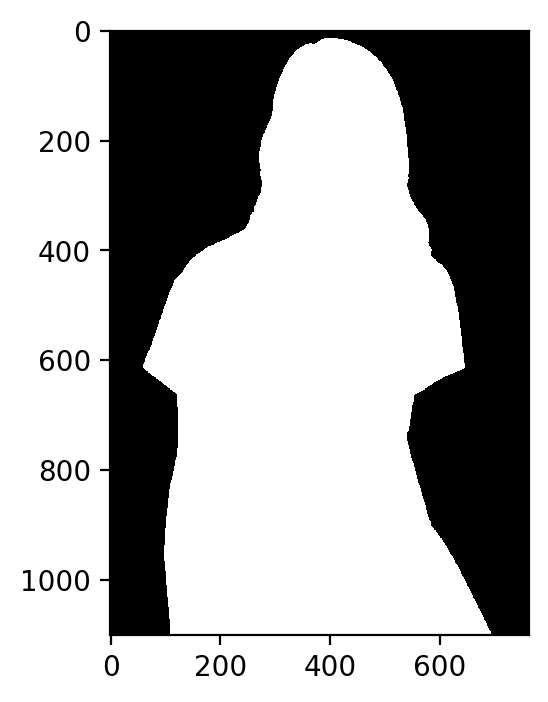

In [64]:
ws = segmentation.watershed(blurred, seed_mask)
plt.imshow(ws)

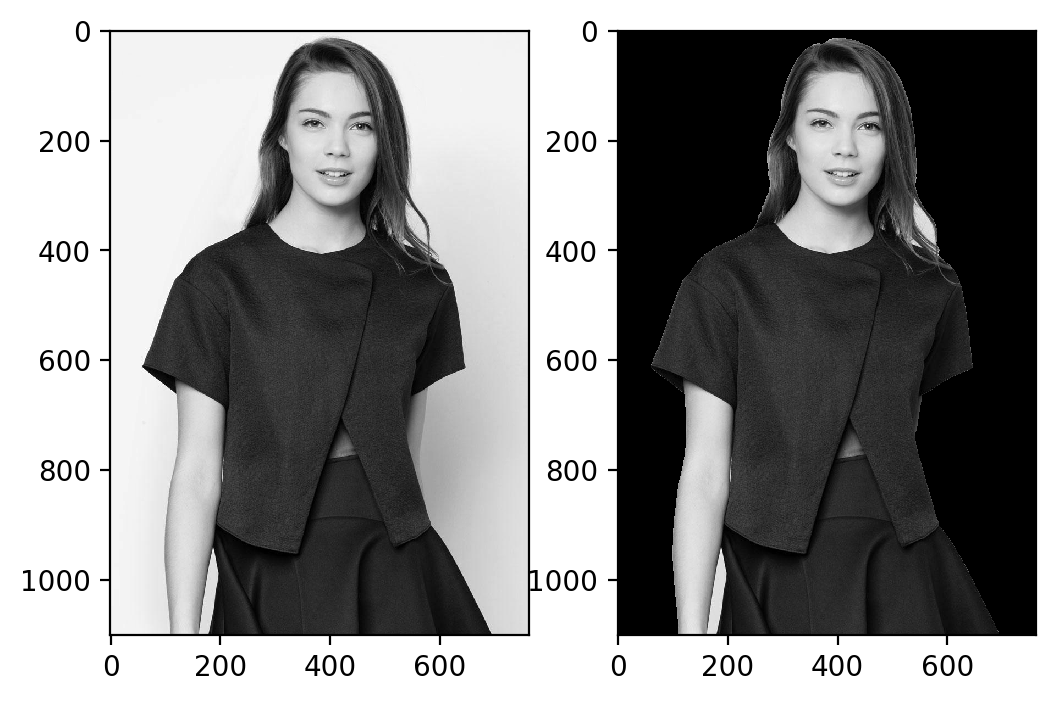

In [65]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
draw_group_as_background(ax[1], 1, ws, img)

# Testing with image from data

In [66]:
fname = '../Capstone/images/data/samples_floral/black&white_floral_dress/00000053.jpg'
img = skio.imread(fname)

In [67]:
print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))

shape of image: (1350, 900, 3)
dtype of image: uint8


In [68]:
from skimage import filters
sobel = filters.sobel(img)

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 200

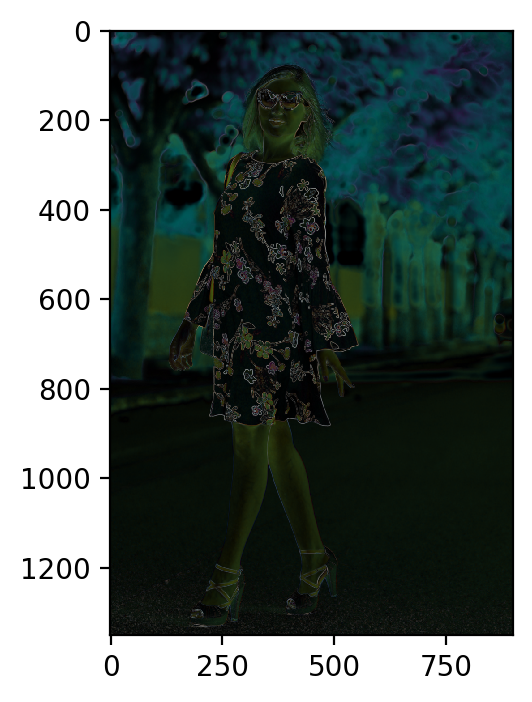

In [70]:
plt.imshow(sobel)

C:\Users\Lawbin\Anaconda3\envs\FTDS\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """Entry point for launching an IPython kernel.


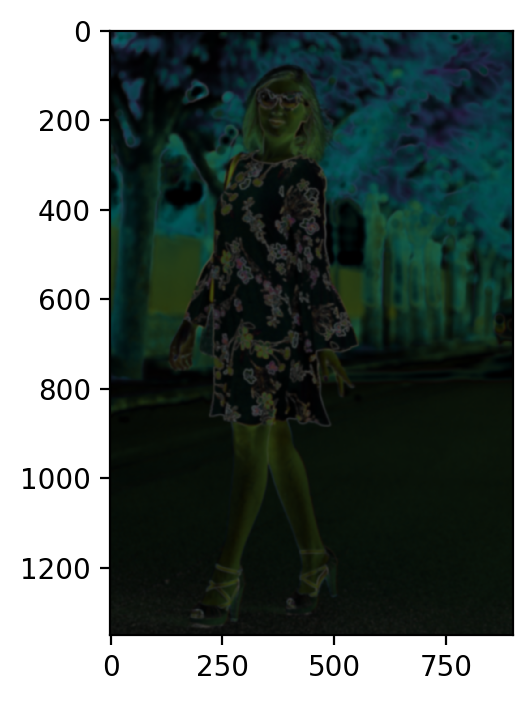

In [71]:
blurred = filters.gaussian(sobel, sigma=2.0)
plt.imshow(blurred)

In [72]:
import numpy as np
light_spots = np.array((img > 245).nonzero()).T

In [73]:
light_spots.shape

(125625, 3)

Text(0.5, 1.0, 'light spots in image')

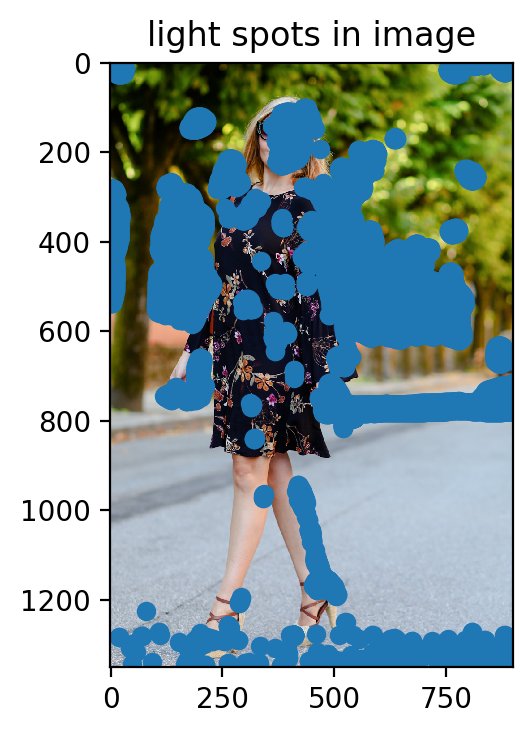

In [74]:
plt.plot(light_spots[:, 1], light_spots[:, 0], 'o')
plt.imshow(img)
plt.title('light spots in image')

Text(0.5, 1.0, 'dark spots in image')

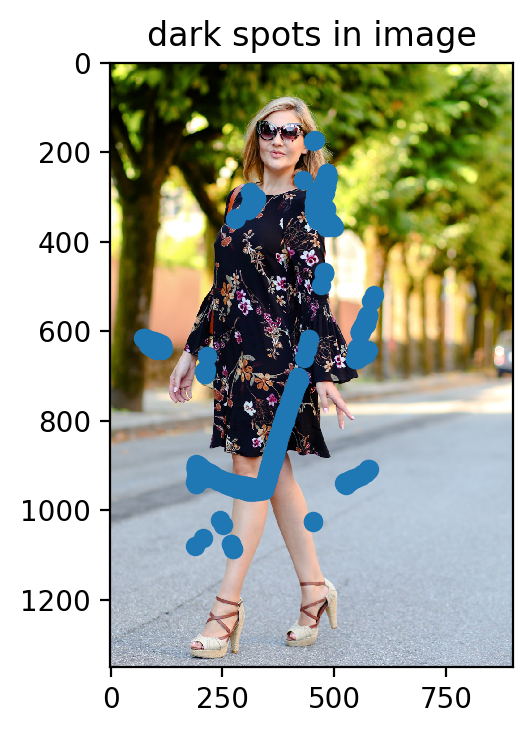

In [75]:
plt.plot(dark_spots[:, 1], dark_spots[:, 0], 'o')
plt.imshow(img)
plt.title('dark spots in image')

In [76]:
from scipy import ndimage as ndi
bool_mask = np.zeros(img.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds

826

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


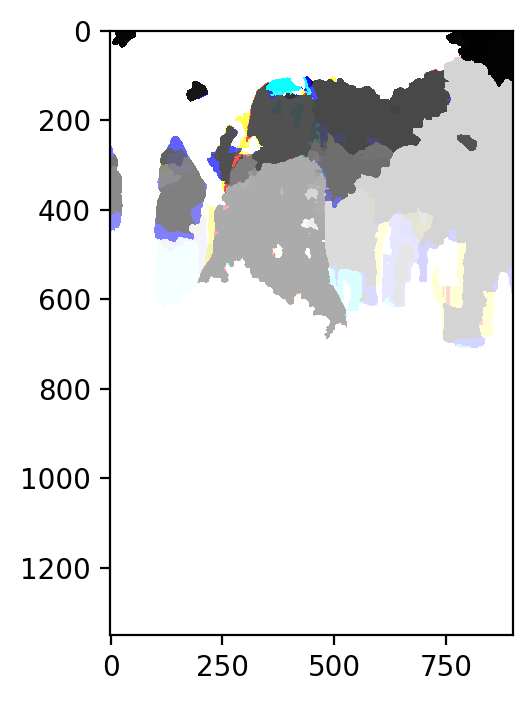

In [77]:
from skimage import segmentation
ws = segmentation.watershed(blurred, seed_mask)
plt.imshow(ws)

In [78]:
background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

604

In [79]:
background_mask = (ws == background)

In [80]:
plt.imshow(~background_mask)

ValueError: Unsupported dtype

<Figure size 1200x800 with 1 Axes>

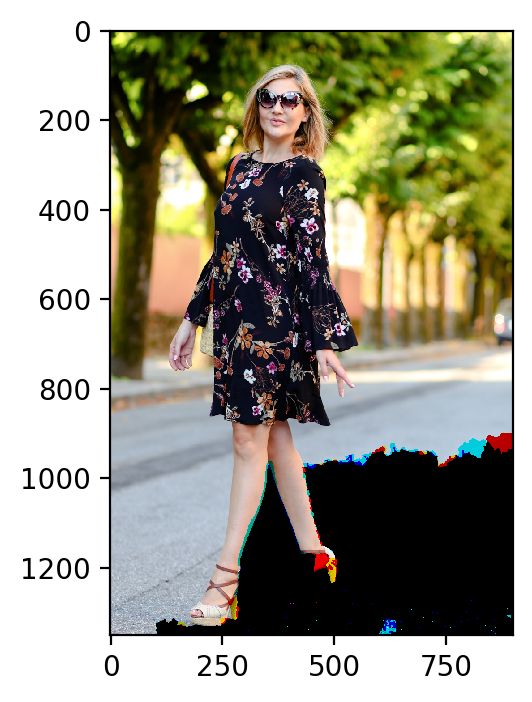

In [81]:
cleaned = img * ~background_mask
plt.imshow(cleaned)

TypeError: Invalid shape (1350, 900, 3, 3) for image data

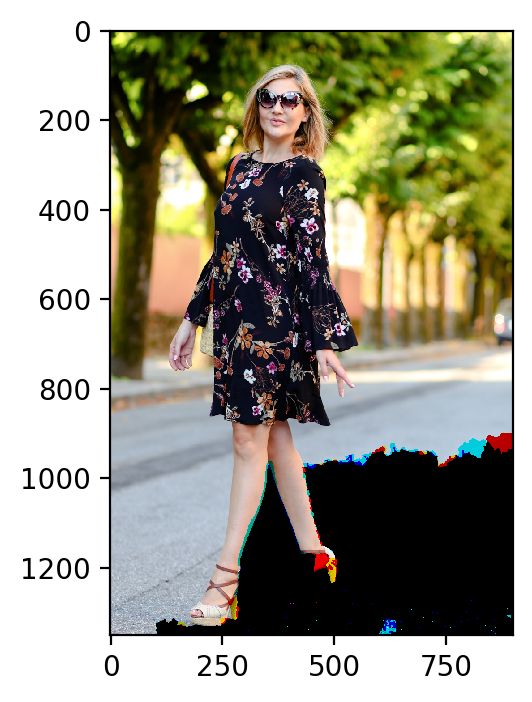

In [82]:
plt.imshow(cleaned, cmap='gray')
plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 1]))

In [ ]:
def draw_group_as_background(ax, group, watershed_result, original_image):
    "Draws a group from the watershed result as red background."
    background_mask = (watershed_result == group)
    cleaned = original_image * ~background_mask
    ax.imshow(cleaned, cmap='gray')
    ax.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

In [ ]:
background_candidates = sorted(set(ws.ravel()), key=lambda g: np.sum(ws == g), reverse=True)

TypeError: Invalid shape (1350, 900, 3, 4) for image data

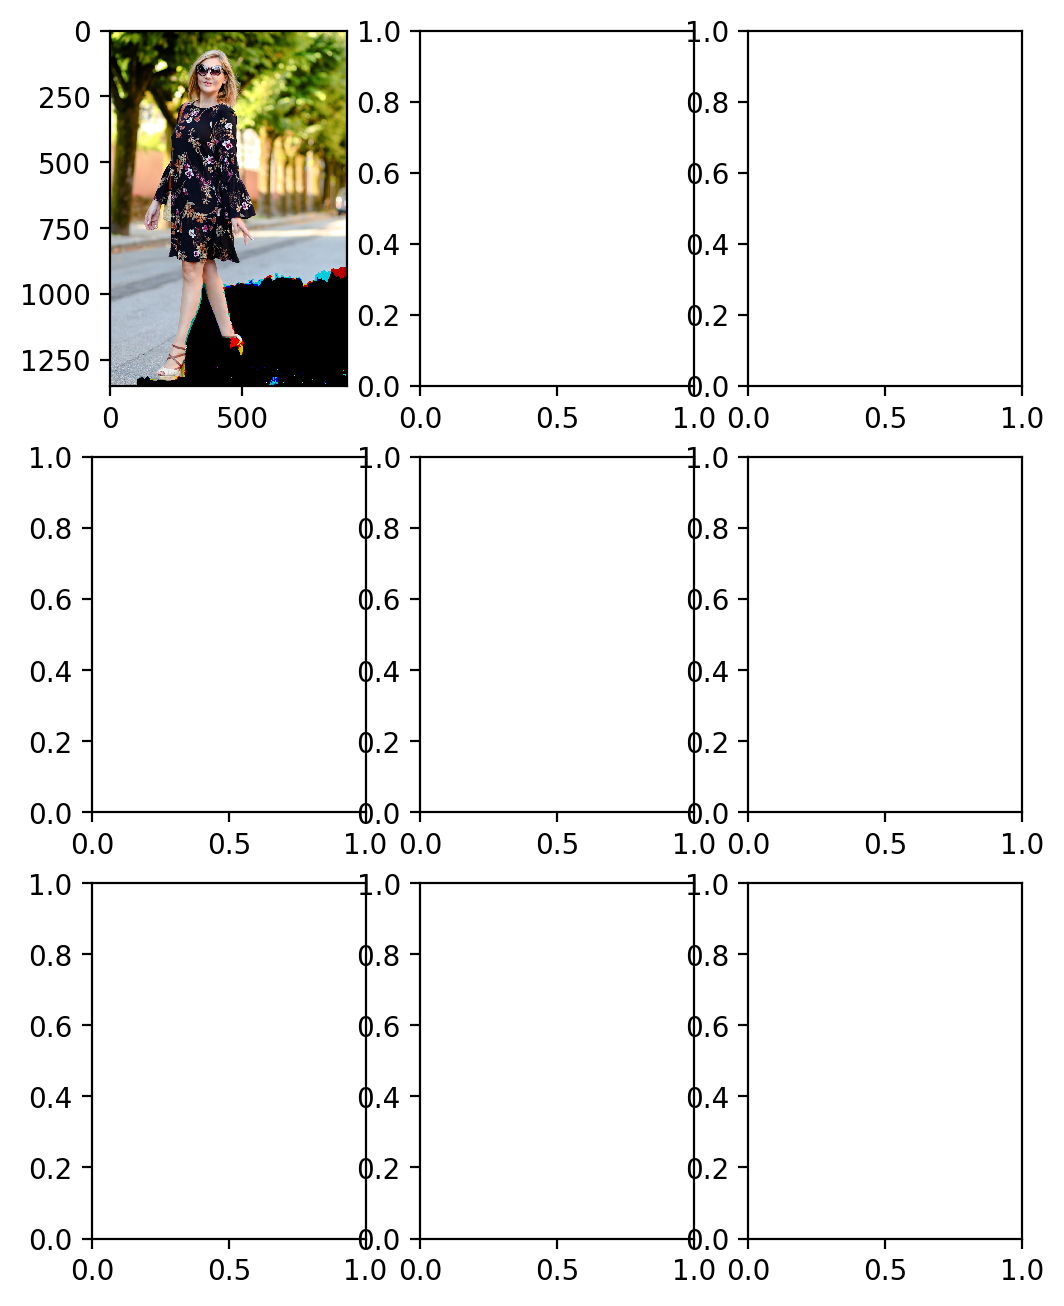

In [64]:
N = 3
fig, axes = plt.subplots(N, N, figsize=(6, 8))
for i in range(N*N):
    draw_group_as_background(axes.ravel()[i], background_candidates[i], ws, img)
plt.tight_layout()

https://stackoverflow.com/questions/51143340/how-to-remove-background-from-image

In [149]:
fname = '../Capstone/images/data/samples_floral/warm_floral_dress/00000213.jpg'
img = skio.imread(fname)

In [5]:
!pip install opencv-python

In [136]:
import numpy as np
import cv2

im = cv2.imread(fname, 1)
im = cv2.resize(im, (0, 0), fx = 0.5, fy = 0.5)   

imhsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
cv2.imshow('Hue', imhsv[:,:,0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [137]:
#--- Otsu threshold ---
ret, thresh = cv2.threshold(imhsv[:,:,0], 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2.imshow('thresh',thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [138]:
fin = cv2.bitwise_and(im, im, mask = thresh)
cv2.imshow('fin', fin)
cv2.waitKey(0)
cv2.destroyAllWindows()

https://stackoverflow.com/questions/29313667/how-do-i-remove-the-background-from-this-kind-of-image

In [5]:
fname = '../Capstone/images/data/warm_classic_shirt/download.jpg'
image = skio.imread(fname)

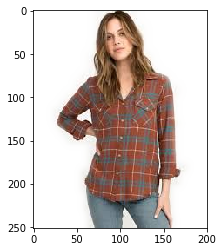

-1

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#== Parameters
BLUR = 21 # blurs an image to smooth it or remove noise in image
CANNY_THRESH_1 = 10 # lower limit -- Canny Thresh = Threshold, if pixel gradient is higher than upper limit then it is
                                                    # accepted as an edge. If pixel gradient between thresholds then only
                                                    # accepted if it is connected to a pixel that is above the upper limit
CANNY_THRESH_2 = 40 # upper limit
MASK_DILATE_ITER = 10 
MASK_ERODE_ITER = 10
MASK_COLOR = (0.0,0.0,1.0) # In BGR format


#== Processing ==

#Read image
img = cv2.imread(fname)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#Edge detection
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

#Find contours in edges, sort by area
contour_info = []
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for c in contours:
    contour_info.append((
        c,
        cv2.isContourConvex(c),
        cv2.contourArea(c),
    ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]

#Create empty mask, draw filled polygon on it corresponding to largest contour
# Mask is black, polygon is white
mask = np.zeros(edges.shape)
cv2.fillConvexPoly(mask, max_contour[0], (255))



#Smooth mask, then blur it
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)

mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

#Blend masked img into MASK_COLOR background
mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
img         = img.astype('float32') / 255.0                 #  for easy blending

masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 

# plt.imsave('img/girl_blue.png', masked)
# split image into channels
c_red, c_green, c_blue = cv2.split(img)

# merge with mask got on one of a previous steps
img_a = cv2.merge((c_blue, c_green, c_red, mask.astype('float32') / 255.0))

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(img_a)
plt.show()

# # save to disk
# cv2.imwrite('img/girl_1.png', img_a*255)

# # or the same using plt
# plt.imsave('img/girl_2.png', img_a)

# cv2.imshow('img', masked)                                   # Displays red, saves blue

cv2.waitKey(0)
cv2.destroyAllWindows()

https://stackoverflow.com/questions/60302695/removing-background-color-from-image-opencv-python

In [11]:
from skimage import io as skio

In [14]:
fname = '../Capstone/images/data/black&white_classic_dress/00000147.jpg'
image = skio.imread(fname)

In [16]:
import cv2
import numpy as np

# Kmeans color segmentation
def kmeans_color_quantization(image, clusters=8, rounds=1):
    h, w = image.shape[:2]
    samples = np.zeros([h*w,3], dtype=np.float32)
    count = 0

    for x in range(h):
        for y in range(w):
            samples[count] = image[x][y]
            count += 1

    compactness, labels, centers = cv2.kmeans(samples,
            clusters, 
            None,
            (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10000, 0.0001), 
            rounds, 
            cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    res = centers[labels.flatten()]
    return res.reshape((image.shape))

# Load image and perform kmeans
image = cv2.imread(fname)
original = image.copy()
kmeans = kmeans_color_quantization(image, clusters=4)

# Convert to grayscale, Gaussian blur, adaptive threshold
gray = cv2.cvtColor(kmeans, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,21,2)

#Find contours in edges, sort by area
contour_info = []
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for c in contours:
    contour_info.append((
        c,
        cv2.isContourConvex(c),
        cv2.contourArea(c),
    ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]

# Draw largest enclosing circle onto a mask
mask = np.zeros(original.shape[:2], dtype=np.uint8)
cv2.fillConvexPoly(mask, max_contour[0], (255))

# Bitwise-and for result
result = cv2.bitwise_and(original, original, mask=mask)
result[mask==0] = (255,255,255)

cv2.imshow('thresh', thresh)
cv2.imshow('result', result)
cv2.imshow('mask', mask)
cv2.imshow('kmeans', kmeans)
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()